In [1]:
import os 
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

In [2]:
#Plot for case and control 
#Control
#Non harmonized 
#BONE image has wonky orientation, needs to be fixed
bone = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/images/clipped_masked_out_BONE/masked_COPDGene_B17317_BONE_control.nii.gz").get_fdata()
std = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/images/clipped_masked_out_STANDARD/masked_COPDGene_B17317_STANDARD_control.nii.gz").get_fdata()
bone_emph = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/insp_BONE_emphysema/emphysema/COPDGene_B17317_BONE_control.nii.gz").get_fdata()
std_emph = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/exp_STANDARD_emphysema/emphysema/COPDGene_B17317_STANDARD_control.nii.gz").get_fdata()
warped = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/nonharm_ANTS_outputs_exptoinsp_large_images/masked_COPDGene_B17317_STANDARD_control/masked_COPDGene_B17317_STANDARD_control_Warped.nii.gz").get_fdata()
warped_emph = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/nonharm_ANTS_outputs_exptoinsp_large_images_emphysema_warped/masked_COPDGene_B17317_STANDARD_control_Warped.nii.gz").get_fdata()

#Harmonized 
bone_harm = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/images/clipped_masked_out_harmonized/masked_COPDGene_B17317_BONE_control.nii.gz").get_fdata()
bone_harm_emph = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema/COPDGene_B17317_BONE_control.nii.gz").get_fdata()
warped_harm = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/nonharm_ANTS_outputs_exptoinsp_large_images/masked_COPDGene_B17317_STANDARD_control/masked_COPDGene_B17317_STANDARD_control_Warped.nii.gz").get_fdata()
warped_harm_emph = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped/masked_COPDGene_B17317_STANDARD_control_Warped.nii.gz").get_fdata()

In [3]:
# Define the base path
base_path = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/"

# Define the new case ID
new_case_id = "B14644"

# Load the data for the new case
bone_case = nib.load(f"{base_path}registration_ANTS_command_line/images/clipped_masked_out_BONE/masked_COPDGene_{new_case_id}_BONE.nii.gz").get_fdata()
std_case = nib.load(f"{base_path}registration_ANTS_command_line/images/clipped_masked_out_STANDARD/masked_COPDGene_{new_case_id}_STANDARD.nii.gz").get_fdata()
bone_emph_case = nib.load(f"{base_path}val_test/insp_BONE_emphysema/emphysema/COPDGene_{new_case_id}_BONE.nii.gz").get_fdata()
std_emph_case = nib.load(f"{base_path}val_test/exp_STANDARD_emphysema/emphysema/COPDGene_{new_case_id}_STANDARD.nii.gz").get_fdata()
warped_case = nib.load(f"/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/nonharm_ANTS_outputs_exptoinsp_large_images/masked_COPDGene_{new_case_id}_STANDARD/masked_COPDGene_{new_case_id}_STANDARD_Warped.nii.gz").get_fdata()
warped_emph_case = nib.load(f"{base_path}registration_ANTS_command_line/nonharm_ANTS_outputs_exptoinsp_large_images_emphysema_warped/masked_COPDGene_{new_case_id}_STANDARD_Warped.nii.gz").get_fdata()

# Harmonized
bone_harm_case = nib.load(f"{base_path}registration_ANTS_command_line/images/clipped_masked_out_harmonized/masked_COPDGene_{new_case_id}_BONE.nii.gz").get_fdata()
bone_harm_emph_case = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema/COPDGene_B14644_BONE.nii.gz").get_fdata()
warped_harm_case = nib.load(f"{base_path}registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images/masked_COPDGene_{new_case_id}_STANDARD/masked_COPDGene_{new_case_id}_STANDARD_Warped.nii.gz").get_fdata()
warped_harm_emph_case = nib.load(f"{base_path}registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped/masked_COPDGene_{new_case_id}_STANDARD_Warped.nii.gz").get_fdata()

/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/ipykernel_launcher.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


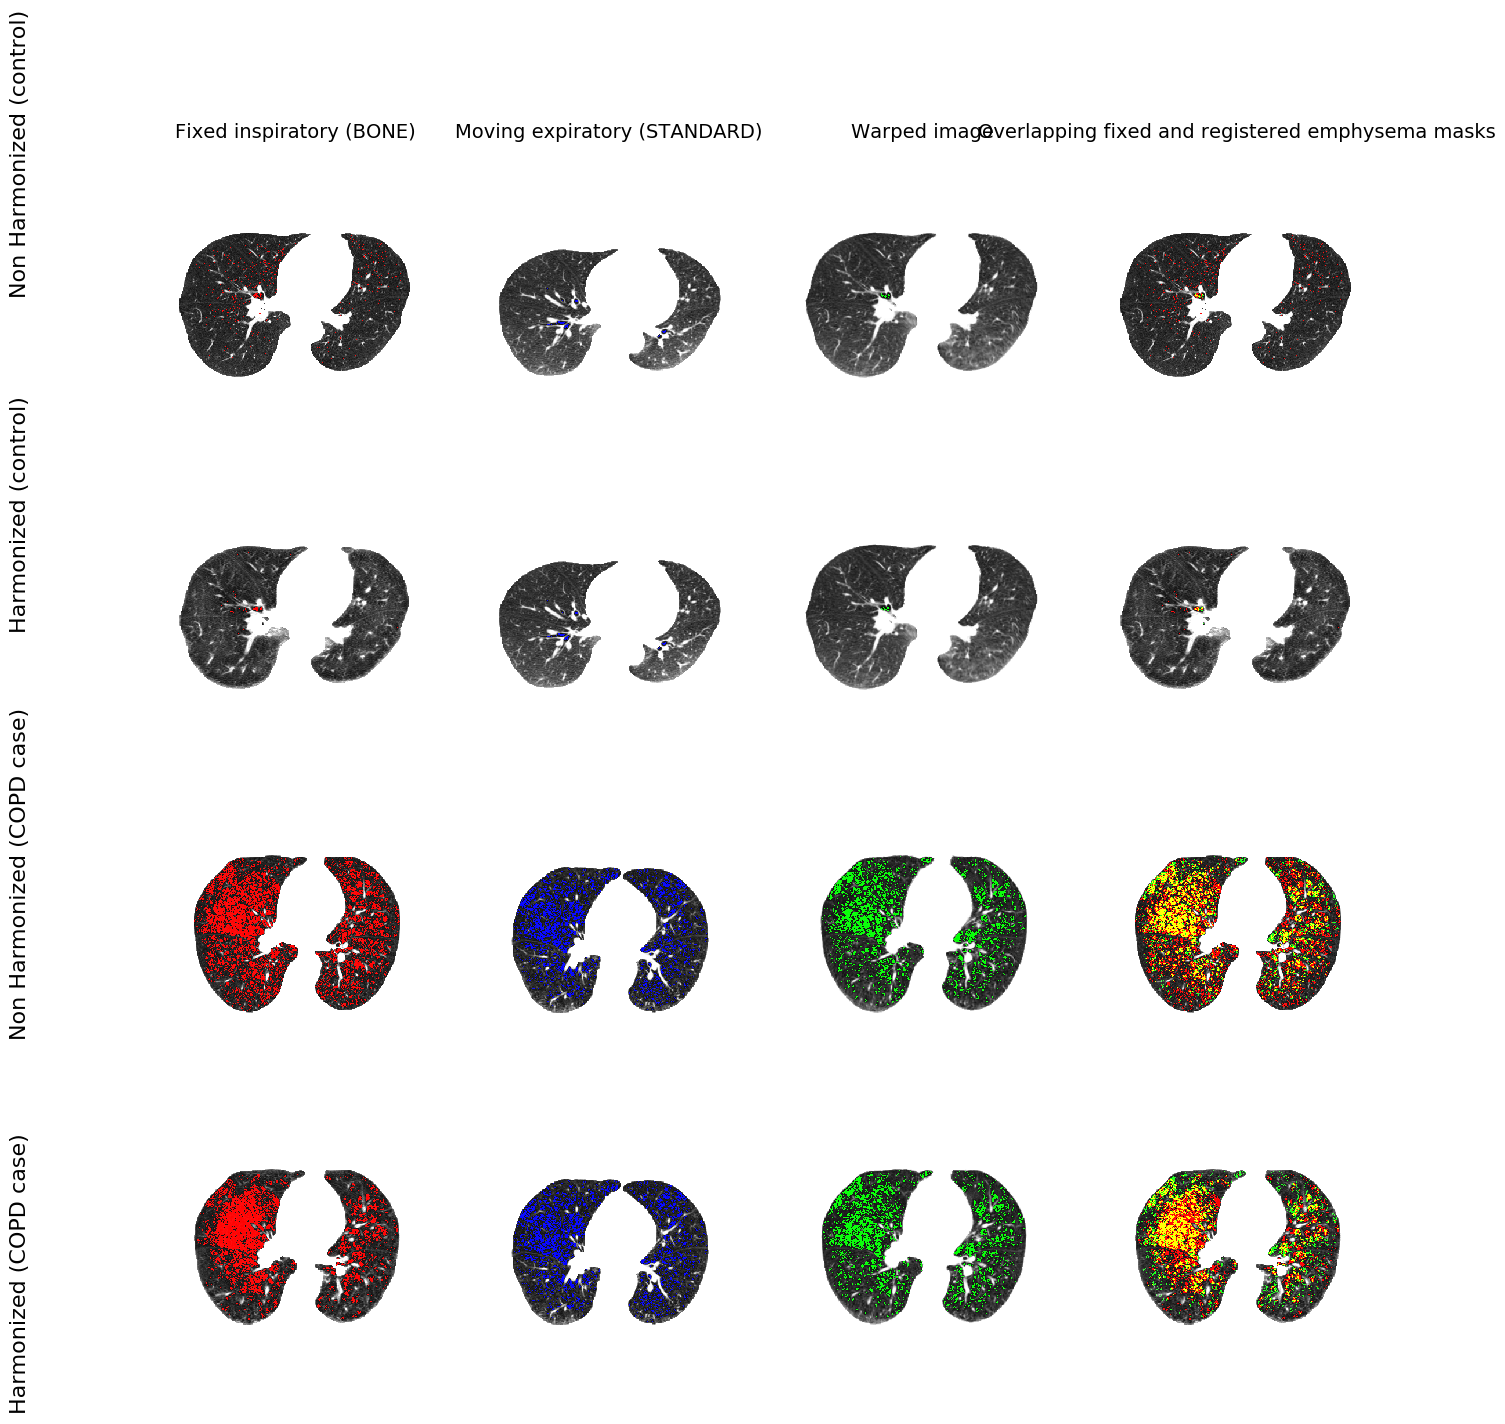

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Function to overlay mask on image
def overlay_mask(image, mask, color=(255, 0, 0), alpha=1.0):
    # Convert image to uint8
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Convert grayscale image to BGR
    image_bgr = cv2.cvtColor(image_uint8, cv2.COLOR_GRAY2BGR)
    
    # Create a color mask
    color_mask = np.zeros_like(image_bgr)
    color_mask[mask == 1] = color
    
    # Overlay the color mask on the image
    overlay = cv2.addWeighted(image_bgr, 1, color_mask, alpha, 0)
    return overlay

# Function to overlay two masks and show overlapping regions in yellow
def overlay_two_masks(image, mask1, mask2):
    # Convert image to uint8
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Convert grayscale image to BGR
    image_bgr = cv2.cvtColor(image_uint8, cv2.COLOR_GRAY2BGR)
    
    # Create color masks
    color_mask1 = np.zeros_like(image_bgr)
    color_mask2 = np.zeros_like(image_bgr)
    color_mask1[mask1 == 1] = (255, 0, 0)  # Red for mask1
    color_mask2[mask2 == 1] = (0, 255, 0)  # Green for mask2
    
    # Combine masks to show overlapping regions in yellow
    combined_mask = np.logical_and(mask1, mask2)
    color_mask1[combined_mask == 1] = (255, 255, 0)  # Yellow for overlapping regions
    
    # Overlay the color masks on the image
    overlay = cv2.addWeighted(image_bgr, 1, color_mask1, 1, 0)
    overlay = cv2.addWeighted(overlay, 1, color_mask2, 1, 0)
    return overlay

# Get middle axial slices and rotate by 90 degrees
bone_mid_slice = np.rot90(np.fliplr(bone[:, :, bone.shape[2] // 2]))
std_mid_slice = np.rot90(std[:, :, std.shape[2] // 2])
bone_emph_mid_slice = np.rot90(bone_emph[:, :, bone_emph.shape[2] // 2])
std_emph_mid_slice = np.rot90(std_emph[:, :, std_emph.shape[2] // 2])
warped_mid_slice = np.rot90(warped[:, :, warped.shape[2] // 2])
warped_emph_mid_slice = np.rot90(warped_emph[:, :, warped_emph.shape[2] // 2])
bone_harm_mid_slice = np.rot90(bone_harm[:, :, bone_harm.shape[2] // 2])
bone_harm_emph_mid_slice = np.rot90(bone_harm_emph[:, :, bone_harm_emph.shape[2] // 2])
warped_harm_mid_slice = np.rot90(warped_harm[:, :, warped_harm.shape[2] // 2])
warped_harm_emph_mid_slice = np.rot90(warped_harm_emph[:, :, warped_harm_emph.shape[2] // 2])

# Get middle axial slices for cases and rotate by 90 degrees
bone_case_mid_slice = np.rot90(bone_case[:, :, bone_case.shape[2] // 2])
std_case_mid_slice = np.rot90(std_case[:, :, std_case.shape[2] // 2])
bone_emph_case_mid_slice = np.rot90(bone_emph_case[:, :, bone_emph_case.shape[2] // 2])
std_emph_case_mid_slice = np.rot90(std_emph_case[:, :, std_emph_case.shape[2] // 2])
warped_case_mid_slice = np.rot90(warped_case[:, :, warped_case.shape[2] // 2])
warped_emph_case_mid_slice = np.rot90(warped_emph_case[:, :, warped_emph_case.shape[2] // 2])
bone_harm_case_mid_slice = np.rot90(bone_harm_case[:, :, bone_harm_case.shape[2] // 2])
bone_harm_emph_case_mid_slice = np.rot90(bone_harm_emph_case[:, :, bone_harm_emph_case.shape[2] // 2])
warped_harm_case_mid_slice = np.rot90(warped_harm_case[:, :, warped_harm_case.shape[2] // 2])
warped_harm_emph_case_mid_slice = np.rot90(warped_harm_emph_case[:, :, warped_harm_emph_case.shape[2] // 2])

# Create figure with gridspec
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(4, 4, wspace=0.05, hspace=0.05)

# Plot non-harmonized images for controls
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(overlay_mask(bone_mid_slice, bone_emph_mid_slice, color=(255, 0, 0)))
ax1.set_title('Fixed inspiratory (BONE)', fontsize=14)
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(overlay_mask(std_mid_slice, std_emph_mid_slice, color=(0, 0, 255)))
ax2.set_title('Moving expiratory (STANDARD)', fontsize=14)
ax2.axis('off')

ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(overlay_mask(warped_mid_slice, warped_emph_mid_slice, color=(0, 255, 0)))
ax3.set_title('Warped image', fontsize=14)
ax3.axis('off')

ax4 = fig.add_subplot(gs[0, 3])
ax4.imshow(overlay_two_masks(bone_mid_slice, bone_emph_mid_slice, warped_emph_mid_slice))
ax4.set_title('Overlapping fixed and registered emphysema masks', fontsize=14)
ax4.axis('off')

# Plot harmonized images for controls
ax5 = fig.add_subplot(gs[1, 0])
ax5.imshow(overlay_mask(bone_harm_mid_slice, bone_harm_emph_mid_slice, color=(255, 0, 0)))
ax5.axis('off')

ax6 = fig.add_subplot(gs[1, 1])
ax6.imshow(overlay_mask(std_mid_slice, std_emph_mid_slice, color=(0, 0, 255)))
ax6.axis('off')

ax7 = fig.add_subplot(gs[1, 2])
ax7.imshow(overlay_mask(warped_harm_mid_slice, warped_harm_emph_mid_slice, color=(0, 255, 0)))
ax7.axis('off')

ax8 = fig.add_subplot(gs[1, 3])
ax8.imshow(overlay_two_masks(bone_harm_mid_slice, bone_harm_emph_mid_slice, warped_harm_emph_mid_slice))
ax8.axis('off')

# Plot non-harmonized images for cases
ax9 = fig.add_subplot(gs[2, 0])
ax9.imshow(overlay_mask(bone_case_mid_slice, bone_emph_case_mid_slice, color=(255, 0, 0)))
ax9.axis('off')

ax10 = fig.add_subplot(gs[2, 1])
ax10.imshow(overlay_mask(std_case_mid_slice, std_emph_case_mid_slice, color=(0, 0, 255)))
ax10.axis('off')

ax11 = fig.add_subplot(gs[2, 2])
ax11.imshow(overlay_mask(warped_case_mid_slice, warped_emph_case_mid_slice, color=(0, 255, 0)))
ax11.axis('off')

ax12 = fig.add_subplot(gs[2, 3])
ax12.imshow(overlay_two_masks(bone_case_mid_slice, bone_emph_case_mid_slice, warped_emph_case_mid_slice))
ax12.axis('off')

# Plot harmonized images for cases
ax13 = fig.add_subplot(gs[3, 0])
ax13.imshow(overlay_mask(bone_harm_case_mid_slice, bone_harm_emph_case_mid_slice, color=(255, 0, 0)))
ax13.axis('off')

ax14 = fig.add_subplot(gs[3, 1])
ax14.imshow(overlay_mask(std_case_mid_slice, std_emph_case_mid_slice, color=(0, 0, 255)))
ax14.axis('off')

ax15 = fig.add_subplot(gs[3, 2])
ax15.imshow(overlay_mask(warped_harm_case_mid_slice, warped_harm_emph_case_mid_slice, color=(0, 255, 0)))
ax15.axis('off')

ax16 = fig.add_subplot(gs[3, 3])
ax16.imshow(overlay_two_masks(bone_harm_case_mid_slice, bone_harm_emph_case_mid_slice, warped_harm_emph_case_mid_slice))
ax16.axis('off')

# Add shared y-labels
fig.text(0.04, 0.875, 'Non Harmonized (control)', va='center', rotation='vertical', fontsize=16)
fig.text(0.04, 0.65, 'Harmonized (control)', va='center', rotation='vertical', fontsize=16)
fig.text(0.04, 0.425, 'Non Harmonized (COPD case)', va='center', rotation='vertical', fontsize=16)
fig.text(0.04, 0.175, 'Harmonized (COPD case)', va='center', rotation='vertical', fontsize=16)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Adjust rect to make space for labels
plt.show()

In [ ]:
# Function to overlay mask on image
def overlay_mask(image, mask, color=(255, 0, 0), alpha=1.0):
    # Convert image to uint8
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Convert grayscale image to BGR
    image_bgr = cv2.cvtColor(image_uint8, cv2.COLOR_GRAY2BGR)
    
    # Create a color mask
    color_mask = np.zeros_like(image_bgr)
    color_mask[mask == 1] = color
    
    # Overlay the color mask on the image
    overlay = cv2.addWeighted(image_bgr, 1, color_mask, alpha, 0)
    return overlay

# Function to overlay two masks and show overlapping regions in yellow
def overlay_two_masks(image, mask1, mask2):
    # Convert image to uint8
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Convert grayscale image to BGR
    image_bgr = cv2.cvtColor(image_uint8, cv2.COLOR_GRAY2BGR)
    
    # Create color masks
    color_mask1 = np.zeros_like(image_bgr)
    color_mask2 = np.zeros_like(image_bgr)
    color_mask1[mask1 == 1] = (255, 0, 0)  # Red for mask1
    color_mask2[mask2 == 1] = (0, 255, 0)  # Green for mask2
    
    # Combine masks to show overlapping regions in yellow
    combined_mask = np.logical_and(mask1, mask2)
    color_mask1[combined_mask == 1] = (255, 255, 0)  # Yellow for overlapping regions
    
    # Overlay the color masks on the image
    overlay = cv2.addWeighted(image_bgr, 1, color_mask1, 1, 0)
    overlay = cv2.addWeighted(overlay, 1, color_mask2, 1, 0)
    return overlay

# Get middle axial slices and rotate by 90 degrees
bone_mid_slice = np.rot90(np.fliplr(bone[:, :, bone.shape[2] // 2]))
std_mid_slice = np.rot90(std[:, :, std.shape[2] // 2])
bone_emph_mid_slice = np.rot90(bone_emph[:, :, bone_emph.shape[2] // 2])
std_emph_mid_slice = np.rot90(std_emph[:, :, std_emph.shape[2] // 2])
warped_mid_slice = np.rot90(warped[:, :, warped.shape[2] // 2])
warped_emph_mid_slice = np.rot90(warped_emph[:, :, warped_emph.shape[2] // 2])
bone_harm_mid_slice = np.rot90(bone_harm[:, :, bone_harm.shape[2] // 2])
bone_harm_emph_mid_slice = np.rot90(bone_harm_emph[:, :, bone_harm_emph.shape[2] // 2])
warped_harm_mid_slice = np.rot90(warped_harm[:, :, warped_harm.shape[2] // 2])
warped_harm_emph_mid_slice = np.rot90(warped_harm_emph[:, :, warped_harm_emph.shape[2] // 2])

# Get middle axial slices for cases and rotate by 90 degrees
bone_case_mid_slice = np.rot90(bone_case[:, :, bone_case.shape[2] // 2])
std_case_mid_slice = np.rot90(std_case[:, :, std_case.shape[2] // 2])
bone_emph_case_mid_slice = np.rot90(bone_emph_case[:, :, bone_emph_case.shape[2] // 2])
std_emph_case_mid_slice = np.rot90(std_emph_case[:, :, std_emph_case.shape[2] // 2])
warped_case_mid_slice = np.rot90(warped_case[:, :, warped_case.shape[2] // 2])
warped_emph_case_mid_slice = np.rot90(warped_emph_case[:, :, warped_emph_case.shape[2] // 2])
bone_harm_case_mid_slice = np.rot90(bone_harm_case[:, :, bone_harm_case.shape[2] // 2])
bone_harm_emph_case_mid_slice = np.rot90(bone_harm_emph_case[:, :, bone_harm_emph_case.shape[2] // 2])
warped_harm_case_mid_slice = np.rot90(warped_harm_case[:, :, warped_harm_case.shape[2] // 2])
warped_harm_emph_case_mid_slice = np.rot90(warped_harm_emph_case[:, :, warped_harm_emph_case.shape[2] // 2])

# Define a function to save images
def save_image(image, filename):
    plt.figure(figsize = (16,16))
    plt.imshow(image)
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=300, format='tiff')
    plt.close()

# Save non-harmonized images for controls
save_image(overlay_mask(bone_mid_slice, bone_emph_mid_slice, color=(255, 0, 0)), 'fixed_inspiratory_bone.png')
save_image(overlay_mask(std_mid_slice, std_emph_mid_slice, color=(0, 0, 255)), 'moving_expiratory_standard.png')
save_image(overlay_mask(warped_mid_slice, warped_emph_mid_slice, color=(0, 255, 0)), 'warped_image.png')
save_image(overlay_two_masks(bone_mid_slice, bone_emph_mid_slice, warped_emph_mid_slice), 'overlapping_fixed_registered_emphysema_masks.png')

# Save harmonized images for controls
save_image(overlay_mask(bone_harm_mid_slice, bone_harm_emph_mid_slice, color=(255, 0, 0)), 'harmonized_fixed_inspiratory_bone.png')
save_image(overlay_mask(std_mid_slice, std_emph_mid_slice, color=(0, 0, 255)), 'harmonized_moving_expiratory_standard.png')
save_image(overlay_mask(warped_harm_mid_slice, warped_harm_emph_mid_slice, color=(0, 255, 0)), 'harmonized_warped_image.png')
save_image(overlay_two_masks(bone_harm_mid_slice, bone_harm_emph_mid_slice, warped_harm_emph_mid_slice), 'harmonized_overlapping_fixed_registered_emphysema_masks.png')

# Save non-harmonized images for cases
save_image(overlay_mask(bone_case_mid_slice, bone_emph_case_mid_slice, color=(255, 0, 0)), 'non_harmonized_fixed_inspiratory_bone_case.png')
save_image(overlay_mask(std_case_mid_slice, std_emph_case_mid_slice, color=(0, 0, 255)), 'non_harmonized_moving_expiratory_standard_case.png')
save_image(overlay_mask(warped_case_mid_slice, warped_emph_case_mid_slice, color=(0, 255, 0)), 'non_harmonized_warped_image_case.png')
save_image(overlay_two_masks(bone_case_mid_slice, bone_emph_case_mid_slice, warped_emph_case_mid_slice), 'non_harmonized_overlapping_fixed_registered_emphysema_masks_case.png')

# Save harmonized images for cases
save_image(overlay_mask(bone_harm_case_mid_slice, bone_harm_emph_case_mid_slice, color=(255, 0, 0)), 'harmonized_fixed_inspiratory_bone_case.png')
save_image(overlay_mask(std_case_mid_slice, std_emph_case_mid_slice, color=(0, 0, 255)), 'harmonized_moving_expiratory_standard_case.png')
save_image(overlay_mask(warped_harm_case_mid_slice, warped_harm_emph_case_mid_slice, color=(0, 255, 0)), 'harmonized_warped_image_case.png')
save_image(overlay_two_masks(bone_harm_case_mid_slice, bone_harm_emph_case_mid_slice, warped_harm_emph_case_mid_slice), 'harmonized_overlapping_fixed_registered_emphysema_masks_case.png')